In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv("./rock_density_xray.csv")
df.columns=["Signal","Density"]
X=df["Signal"]
y=df["Density"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [15]:
def runModel(model):
    model.fit(X_train.values.reshape(-1,1),y_train)
    predictions=model.predict(X_test.values.reshape(-1,1))
    print("MAE",mean_absolute_error(y_test,predictions))
    print("MSE",mean_squared_error(y_test,predictions))
    
    x_plot=np.arange(1,100)
    y_plot=model.predict(x_plot.reshape(-1,1))
    sbn.scatterplot(data=df,x="Signal",y="Density")
    plt.plot(x_plot,y_plot,color="red")


    
    

MAE 0.2603798674915321
MSE 0.09681629332564312


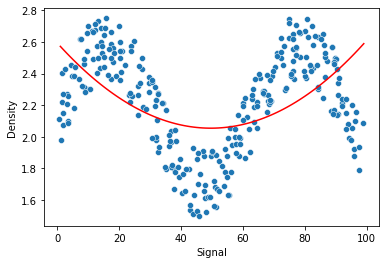

In [16]:
pipeline=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
runModel(pipeline)

MAE 0.12740135594092603
MSE 0.020897789526297294


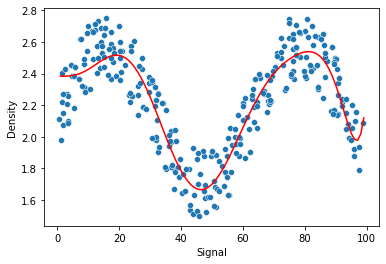

In [17]:
pipeline=make_pipeline(PolynomialFeatures(degree=10),LinearRegression())
runModel(pipeline)

MAE 0.1257364934407526
MSE 0.01961572432313934


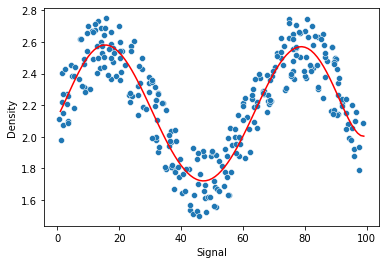

In [18]:
pipeline=make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
runModel(pipeline)